In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [3]:
names = ['age','workclass','fnlwgt','education','education_num','martial_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [4]:

df1 = pd.read_csv("adult.data",delimiter=',',names=names,skipinitialspace=True)
df2 = pd.read_csv("adult.test",delimiter=',',names=names,skipinitialspace=True)

In [5]:
df2 = df2.drop(df2.index[0])

In [6]:
df1.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [8]:
df.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education_num     float64
martial_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income             object
dtype: object

In [9]:
for col in ['income']:
    df[col]=df[col].str.replace(".","")

In [10]:
df.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [11]:
for col in ['age']:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [12]:
df.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education_num     float64
martial_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income             object
dtype: object

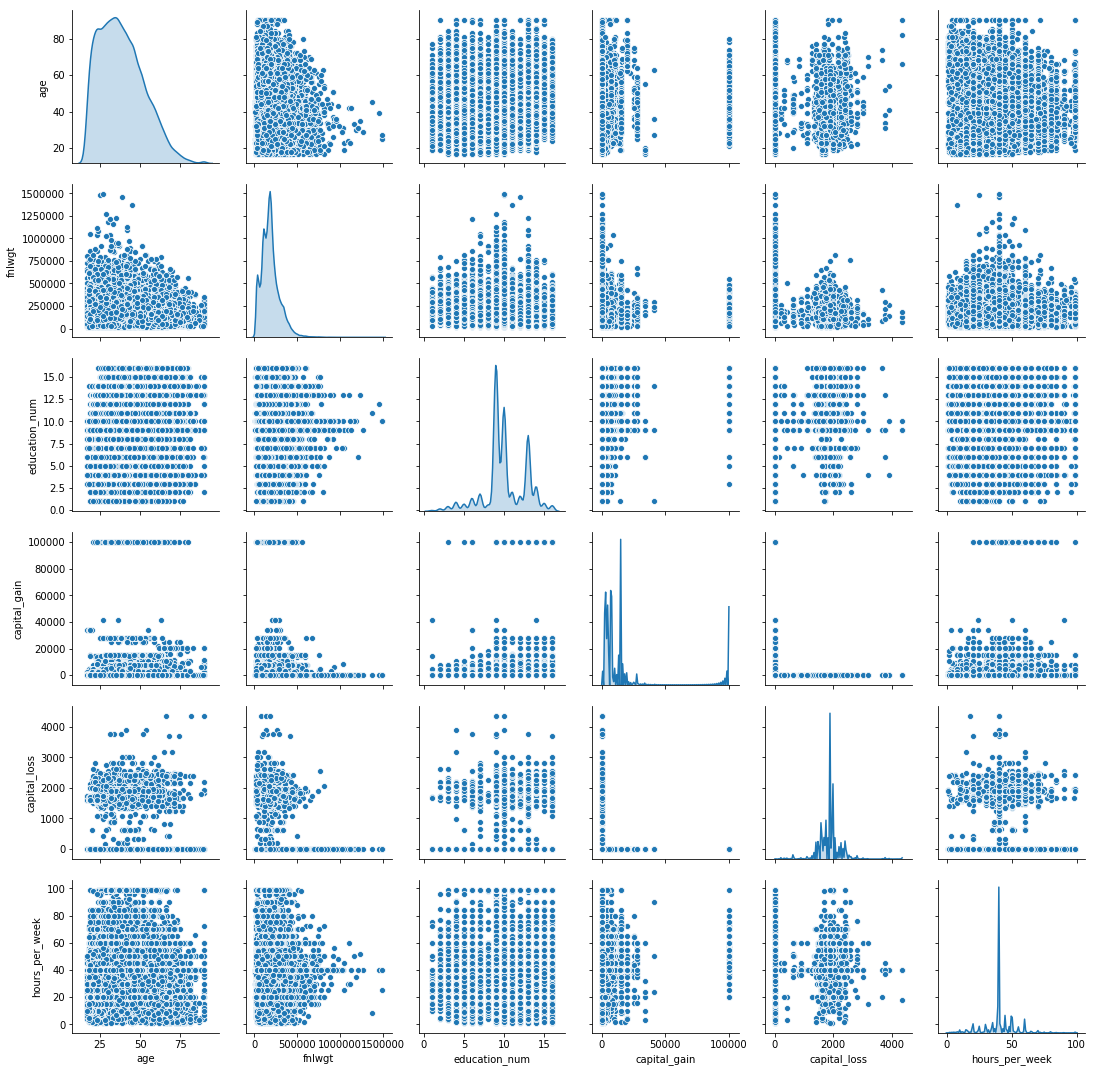

In [13]:
sns.pairplot(df ,diag_kind='kde')

In [14]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [16]:
df = df.replace('?',np.NaN)
def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col
df=df.apply(lambda col:fillna(col))

In [17]:
df1=pd.get_dummies(df['income'],drop_first=True)

In [18]:
df1.shape

(48842, 1)

In [19]:
df2=df.drop(['income'],axis=1)

In [20]:
cat_cols=df2.select_dtypes(['object']).columns

In [21]:
cat_cols

Index(['workclass', 'education', 'martial_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [22]:
for col in cat_cols:
    freqs=df2[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+'_'+cat
        df2[name]=(df2[col]==cat).astype(int)
    del df2[col]
    print(col)

workclass
education
martial_status
occupation
relationship
race
sex
native_country


In [23]:
X = np.array(df2)
X.shape

(48842, 92)

In [24]:
y=df1.values
y.shape

(48842, 1)

In [25]:
df2.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Private,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_State-gov,...,native_country_Ecuador,native_country_France,native_country_Ireland,native_country_Hong,native_country_Thailand,native_country_Cambodia,native_country_Trinadad&Tobago,native_country_Yugoslavia,native_country_Laos,native_country_Outlying-US(Guam-USVI-etc)
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,-0.189439,0.142956,0.057935,0.013029,...,-0.002164,0.003403,-0.000315,-0.007975,-0.001766,-0.003058,0.001056,0.002905,-0.005424,0.000289
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,0.042687,-0.039082,0.001233,-0.015051,...,-0.003188,-0.000835,-0.011360,0.005458,-0.001512,0.002411,0.004153,0.004699,0.003114,-0.000887
education_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,-0.169104,0.017011,0.097210,0.104692,...,-0.009847,0.020860,-0.003152,0.003426,0.007283,-0.006383,-0.010201,-0.005798,-0.010570,-0.000292
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,-0.049687,0.027630,-0.009872,-0.008904,...,-0.003060,-0.002477,-0.002159,-0.001924,-0.002781,-0.001226,-0.003039,-0.000474,-0.002778,-0.003143
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,-0.033380,0.015884,0.009504,-0.002450,...,-0.006594,-0.003493,0.000594,0.010333,-0.002338,0.006378,0.004028,-0.004713,-0.000638,-0.000587
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,-0.111492,0.093944,0.008981,-0.022094,...,-0.002832,0.005330,0.004466,-0.000312,0.008558,0.003118,-0.002911,-0.000359,-0.001806,0.001621
workclass_Private,-0.189439,0.042687,-0.169104,-0.049687,-0.033380,-0.111492,1.000000,-0.509569,-0.455521,-0.357555,...,0.008093,-0.002646,0.008945,0.006607,-0.002955,0.005855,-0.000586,-0.000622,0.008114,0.005930
workclass_Self-emp-not-inc,0.142956,-0.039082,0.017011,0.027630,0.015884,0.093944,-0.509569,1.000000,-0.076753,-0.060247,...,-0.001396,-0.000013,0.000205,-0.007264,0.001923,-0.000678,-0.003663,0.007629,-0.006360,-0.002863
workclass_Local-gov,0.057935,0.001233,0.097210,-0.009872,0.009504,0.008981,-0.455521,-0.076753,1.000000,-0.053856,...,-0.005201,0.004674,-0.007212,-0.003123,-0.003123,-0.006273,0.000947,-0.001836,-0.001836,-0.001836
workclass_State-gov,0.013029,-0.015051,0.104692,-0.008904,-0.002450,-0.022094,-0.357555,-0.060247,-0.053856,1.000000,...,0.000598,-0.002015,-0.005661,0.003281,-0.000908,-0.000588,-0.000420,-0.004463,-0.004463,0.000321


# KNN

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [27]:
NNH.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [28]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7698082303965058

In [29]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[9951 1201]
 [2172 1329]]


#  LOGESTIC REGRESSION

In [30]:
model = LogisticRegression(solver='lbfgs', max_iter = 500)
model.fit(X_train, np.ravel(y_train))
y_predict = model.predict(X_test)

model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7867330921995496
[[10437   715]
 [ 2410  1091]]


# naive 

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gmodel = GaussianNB()
gmodel.fit(X_train, np.ravel(y_train))
print(gmodel)

expected = y_test
predicted = model.predict(X_test)

print(metrics.confusion_matrix(expected, predicted))
gmodel_score = model.score(X_test, y_test)

GaussianNB(priors=None, var_smoothing=1e-09)
[[10437   715]
 [ 2410  1091]]


In [33]:
gmodel_score

0.7867330921995496

# DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [36]:
dt_model.fit(X_train, y_train)
y_p = dt_model.predict(X_test)

In [37]:
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))

0.9999707508262892
0.8126663481880844


In [38]:
print(metrics.confusion_matrix(y_test, y_p))

[[9742 1410]
 [1335 2166]]


# dataframe 

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [40]:
knn_accuracy = accuracy_score(y_test, predicted_labels)

In [41]:
lr_accuracy = accuracy_score(y_test, y_predict)

In [42]:
nb_accuracy = accuracy_score(y_test, predicted)

In [43]:
dt_accuracy = accuracy_score(y_test, y_p)

In [44]:
list0 = [knn_accuracy,lr_accuracy,nb_accuracy,dt_accuracy]

In [45]:
knn_pre = precision_score(y_test, predicted_labels)

In [46]:
lr_pre = precision_score(y_test, y_predict)

In [47]:
nb_pre = precision_score(y_test, predicted)

In [48]:
dt_pre = precision_score(y_test, y_p)

In [49]:
list1 = [knn_pre,lr_pre,nb_pre,dt_pre]

In [50]:
knn_re = recall_score(y_test, predicted_labels)

In [51]:
lr_re = recall_score(y_test, y_predict)

In [52]:
nb_re = recall_score(y_test, predicted)

In [53]:
dt_re = recall_score(y_test, y_p)

In [54]:
list2 = [knn_pre,lr_pre,nb_pre,dt_pre]

In [55]:
name = ['KNN','LINEAR_REG','NAIVE','DECISION_TREE']

In [56]:
d = {'name':name,'accuracy':list0,'precision':list1,'recall':list2}

In [57]:
data = pd.DataFrame(d)

In [58]:
data

,name,accuracy,precision,recall
0,KNN,0.769808,0.525296,0.525296
1,LINEAR_REG,0.786733,0.604097,0.604097
2,NAIVE,0.786733,0.604097,0.604097
3,DECISION_TREE,0.812666,0.605705,0.605705


# removing column

# dropping the education column because it means the same as education_num

In [73]:
dfsample =  df.drop(['education','native_country','income'],axis=1)
dfsample.dtypes

age                 int64
workclass          object
fnlwgt            float64
education_num     float64
martial_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
dtype: object

In [74]:
df_cat_cols=dfsample.select_dtypes(['object']).columns


In [75]:
df_cat_cols

Index(['workclass', 'martial_status', 'occupation', 'relationship', 'race',
       'sex'],
      dtype='object')

In [76]:
for col in df_cat_cols:
    freqs=dfsample[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+'_'+cat
        dfsample[name]=(dfsample[col]==cat).astype(int)
    del dfsample[col]
    print(col)

workclass
martial_status
occupation
relationship
race
sex


In [77]:
dfsample.shape

(48842, 40)

In [78]:
X1 = np.array(dfsample)
X1.shape

(48842, 40)

In [79]:
y1=df1.values
y.shape

(48842, 1)

knn

In [80]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=1)

In [81]:
NNH.fit(X1_train, np.ravel(y1_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [82]:
predicted_labels = NNH.predict(X1_test)
NNH.score(X1_test, y1_test)

0.7696034941650174

In [83]:
print(metrics.confusion_matrix(y1_test, predicted_labels))

[[9946 1206]
 [2170 1331]]


# decision tree with max_depth = 7

In [70]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=7 )

In [71]:
dt_model.fit(X_train, y_train)
y_pr = dt_model.predict(X_test)

In [72]:
print(metrics.confusion_matrix(y_test, y_pr))

[[10652   500]
 [ 1605  1896]]
